# **[230117] Visualization 시각화**
발표자: 8기 안세정

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualization의 필요성

1. 데이터에 대한 직관적인 이해
2. 데이터의 트렌드 파악
3. 변수 간 관계 파악
4. 효과적인 전달(커뮤니케이션)

# 데이터 종류



## 수치형 vs. 범주형
![picture](https://drive.google.com/uc?id=1s8sUtnR4PziflwTN1BziXWGdmgH30D2h)





## 일변량(Univariate) vs. 다변량(Multivariate)
- 일변량(Univariate): 고려하는 변수가 1개
- 다변량(Multivariate): 고려하는 변수가 2개 이상
<br>
<br>

<img src='https://drive.google.com/uc?id=1WyWUVNZe5eHjSotXqvCy6LgUVpwo9cjW' width="500" height="150">

# 시각화 패키지 (matplotlib vs. seaborn)

## matplotlib
[matplotlib](https://matplotlib.org/stable/gallery/index.html)
: 파이썬에서 데이터를 차트(chart)나 플롯(plot) 형태로 시각화하는 패키지

## pyplot
매트랩(matlab)이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 해주는 matplotlib의 서브패키지


## seaborn
[seaborn](http://seaborn.pydata.org/)
: matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

# 사전 세팅

In [ ]:
# 코랩/아나콘다 주피터 노트북 이용시 기본적으로 설치되어 있음 (설치)
# !pip install matplotlib
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 주피터 노트북 사용시 노트북 내부에 그림을 표시하도록 지정
# %matplotlib inline

# plot 소개

## 데이터셋 불러오기

In [ ]:
flights = pd.read_csv('/content/drive/MyDrive/Visualization 세션/flights.csv')
hotels = pd.read_csv('/content/drive/MyDrive/Visualization 세션/hotels.csv')

In [ ]:
# flights 데이터 확인
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
# hotels 데이터 확인
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


## countplot
각 카테고리별로 데이터가 얼마나 있는지 표시 (절대량)

[seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot)

In [ ]:
# flightType 카테고리 확인
flights['flightType'].unique()

array(['firstClass', 'economic', 'premium'], dtype=object)

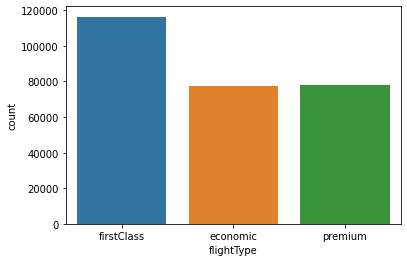

In [ ]:
# 범주형: flightType이라는 카테고리에 대한 시각화
# 일변량: flightType라는 변수 하나만 고려
sns.countplot(data = flights, x = 'flightType')
plt.show() 

In [ ]:
# agency 카테고리 확인
flights['agency'].unique()

array(['FlyingDrops', 'CloudFy', 'Rainbow'], dtype=object)

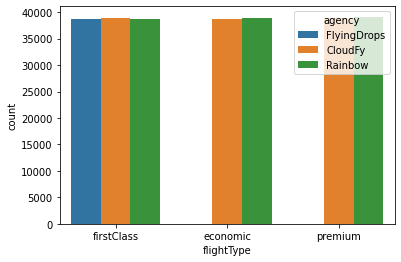

In [ ]:
# 범주형: flightType과 agency라는 카테고리에 대한 시각화
# 다변량(이변량): flightType, agency 두 개의 변수 고려
# hue: color encoding 될 변수 설정 (이변량 시각화에 유용!)
sns.countplot(data = flights, x = 'flightType', hue = 'agency')
plt.show()

## histogram
수치형 변수의 구간별 빈도 표현

[matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) <br>

[seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=hist#seaborn.histplot)

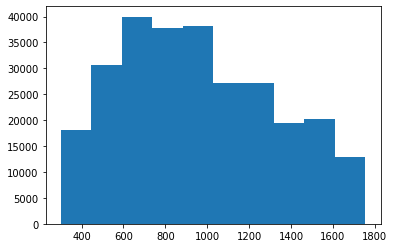

In [ ]:
# matplotlib 이용
# 수치형: price라는 연속적인 수치형 데이터 구간화한 후 시각화
# 일변량: price라는 변수 하나만 고려
plt.hist(flights['price'])
plt.show()

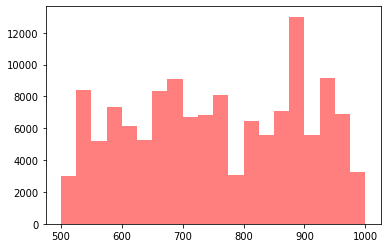

In [ ]:
# matplotlib
# bins: 구간의 수
# alpha: 투명도
# range: 범위
plt.hist(flights['price'], bins = 20, color = 'red', alpha = 0.5, range = (500, 1000))
plt.show()

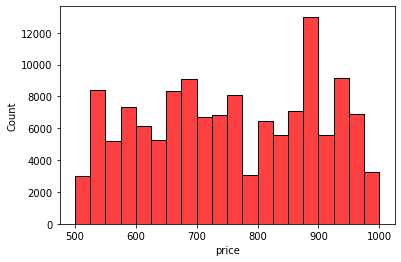

In [ ]:
# seaborn
sns.histplot(data = flights, x = 'price', color = 'red', bins = 20, binrange = (500, 1000))
plt.show()

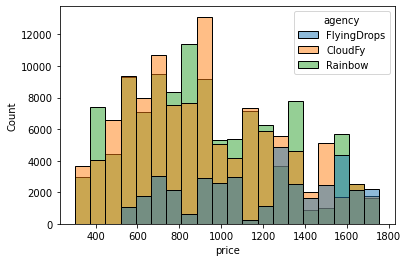

In [ ]:
# seaborn
# 수치형 + 범주형
# 다변량(이변량): price, agency 두 개의 변수 고려
sns.histplot(data = flights, x = 'price', bins = 20, hue = 'agency')
plt.show()

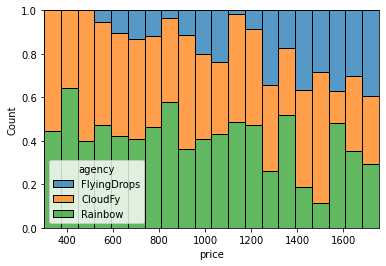

In [ ]:
# seaborn
# multiple: 이변량 시각화에서 적절 (기본 = 'layer', 그 외에도 'dodge', 'stack', 'fill')
sns.histplot(data = flights, x = 'price', bins = 20, hue = 'agency', multiple = 'fill')
plt.show()

In [ ]:
# unique한 days 확인
hotels['days'].unique()

array([4, 2, 3, 1])

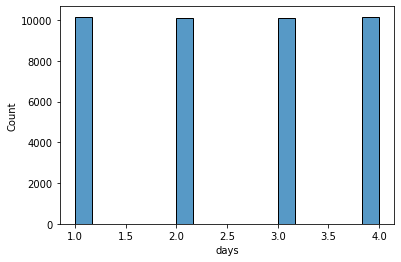

In [ ]:
# seaborn
# 이산형 수치 데이터
sns.histplot(data = hotels, x = 'days')
plt.show()

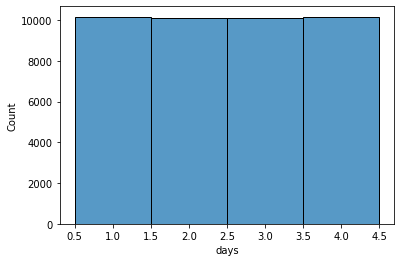

In [ ]:
# seaborn
# discrete: 이산형 수치 데이터에 적용 시 적절; 해당 값이 중앙에 오도록 정렬함으로써 막대 사이에 빈칸 없앰
sns.histplot(data = hotels, x = 'days', discrete = True)
# sns.countplot(data = hotels, x = 'days')
plt.show()

## barchart
각 카테고리 별 수치형 데이터 표현

[matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar)

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)

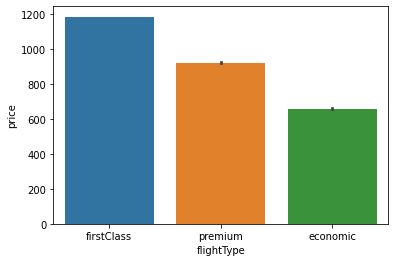

In [ ]:
# seaborn
# 범주형 + 수치형
# 다변량(이변량): price, flightType 두 개의 변수 고려
# order: 순서 정렬
sns.barplot(data = flights, x = 'flightType', y = 'price', order = ['firstClass', 'premium', 'economic'])
plt.show()

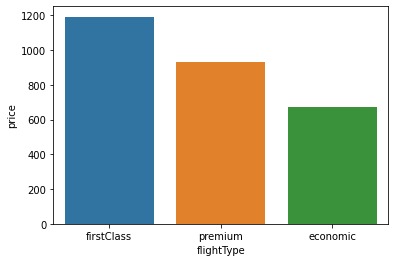

In [ ]:
# seaborn
# estimator: y 변수에 대한 통계적 수치 지정 (기본 = np.mean, 그 외에도 'np.median', 'np.sum' 등)
sns.barplot(data = flights, x = 'flightType', y = 'price', estimator = np.median, order = ['firstClass', 'premium', 'economic'])
plt.show()

In [ ]:
print(flights['flightType'].unique())
index = np.arange(3) # flightType 개수 3개
print(index)
mean_price_by_flightType = flights.groupby('flightType').price.mean()
print(mean_price_by_flightType) # flightType별 평균 가격

['firstClass' 'economic' 'premium']
[0 1 2]
flightType
economic       658.443093
firstClass    1181.067727
premium        920.392375
Name: price, dtype: float64


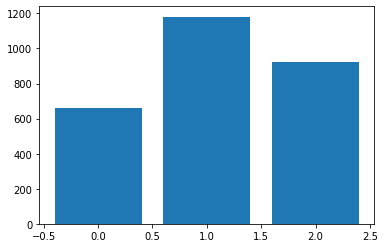

In [ ]:
# matplotlib
ordered_idx = mean_price_by_flightType.index
plt.bar(x = index, height = mean_price_by_flightType)
plt.show()

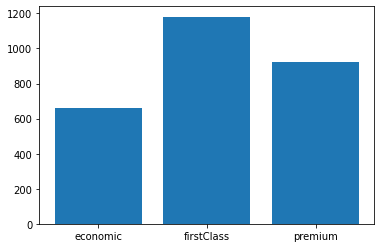

In [ ]:
# matplotlib
# xticks: (눈금을 적용할 x축의 실제 위치, 해당 위치에 나타낼 값)
plt.bar(x = index, height = mean_price_by_flightType)
plt.xticks(index, ['economic', 'firstClass', 'premium'])
plt.show()

## boxplot
카테고리 값별 수치형 변수의 분포 표시
* 박스의 윗변 : 75% quartile (제3사분위수, Q3)
* 박스의 아랫변 : 25% quartile (제1사분위수, Q1)
* 박스의 중간 선 : 중앙값
* IQR : Q3 - Q1
* 박스 아래의 선 : Q1 - 1.5*IQR
* 박스 위의 선 : Q3 + 1.5*IQR
* 그 외의 점 : 아웃라이어(outlier)

[matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot)

[seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)

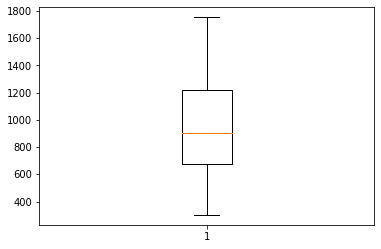

In [ ]:
# matplotlib
# 수치형: price라는 연속적인 수치형 데이터
# 일변량: price라는 변수 하나만 고려
plt.boxplot(x = flights['price'])
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


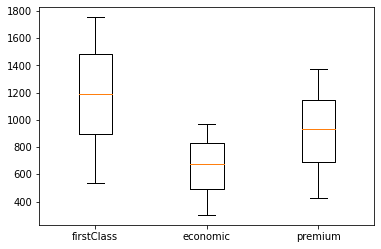

In [ ]:
# matplotlib
# 수치형 + 범주형
# 다변량: flight, price 두 개의 변수 고려
plt.boxplot([flights[flights['flightType']=='firstClass']['price'],
           flights[flights['flightType']=='economic']['price'],
           flights[flights['flightType']=='premium']['price']],
           sym = 'b*')
plt.xticks([1, 2, 3], ['firstClass', 'economic', 'premium'])
plt.show()

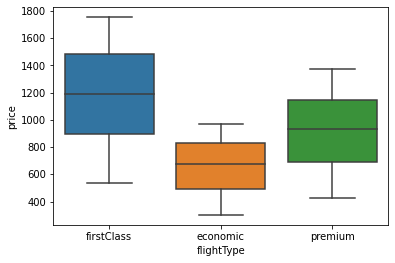

In [ ]:
# seaborn
sns.boxplot(data = flights, x = 'flightType', y = 'price')
plt.show()

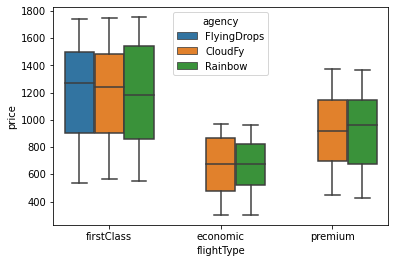

In [ ]:
# seaborn
# 수치형 + 범주형
# 다변량: flight, agency, price 세 개의 변수 고려
sns.boxplot(data = flights, x = 'flightType', y = 'price', hue = 'agency')
plt.show()

## piechart
전체에 대한 각 카테고리의 비율 표시

[matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html?highlight=pie#matplotlib.pyplot.pie)

In [ ]:
# agency별 개수 확인
ag_count = flights['agency'].value_counts()
print(ag_count)

Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: agency, dtype: int64


In [ ]:
sizes = [ag_count[0], ag_count[1], ag_count[2]] # 각 파이의 크기
labels = ['Rainbow', 'CloudFy', 'FlyingDrops']
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explodes = (0.1, 0, 0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

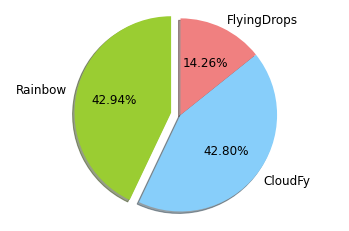

In [ ]:
# 범주형
# 일변량
plt.pie(sizes,
        labels = labels,
        colors = colors,
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12})
plt.axis('equal')
plt.show()

## scatterplot
두 실수 데이터 집합의 상관관계 시각화

[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)

[seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatter#seaborn.scatterplot)

In [16]:
# iris 데이터 로드 및 확인
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


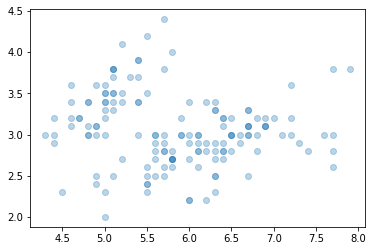

In [ ]:
# matplotlib
# 수치형
# 다변량
plt.scatter(iris['sepal_length'],iris['sepal_width'], alpha = 0.3)
plt.show()

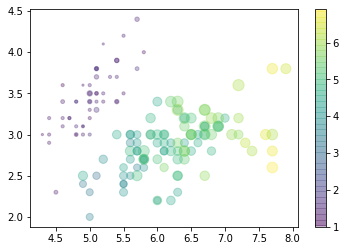

In [ ]:
# matplotlib
# cmap: colormap (팔레트와 비슷한 개념)
# c: 어느 변수에 대하여 color encoding 할 것인지
# s: 어느 변수에 대하여 size encoding 할 것인지
plt.scatter(iris['sepal_length'],iris['sepal_width'], alpha = 0.3, cmap = 'viridis', c = iris['petal_length'], s = iris['petal_width']*50)
plt.colorbar()
plt.show()

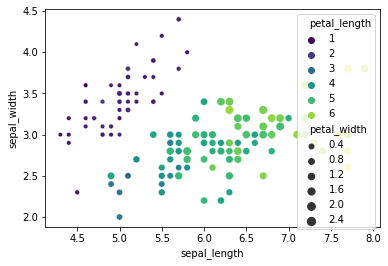

In [ ]:
# seaborn
# hue: 어느 변수에 대하여 color encoding 할 것인지
# size: 어느 변수에 대하여 size encoding 할 것인지
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'petal_length', size = 'petal_width', palette = 'viridis')
plt.show()

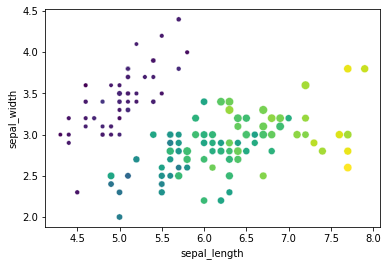

In [ ]:
# seaborn
# legend: False 입력 시 범례 제거
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'petal_length', size = 'petal_width', palette = 'viridis', legend = False)
plt.show()

## trendline
데이터들 간에 존재하는 추세선 표시

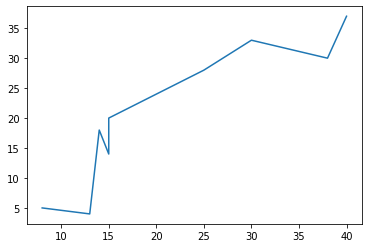

In [19]:
# 데이터 생성 및 확인
x = np.array([8, 13, 14, 15, 15, 20, 25, 30, 38, 40])
y = np.array([5, 4, 18, 14, 20, 24, 28, 33, 30, 37])
plt.plot(x, y)

In [20]:
# trendline 계산
# np.polyfit(x, y, '차수')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

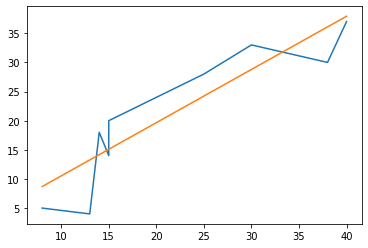

In [22]:
# trendline 추가
plt.plot(x, y)
plt.plot(x, p(x))

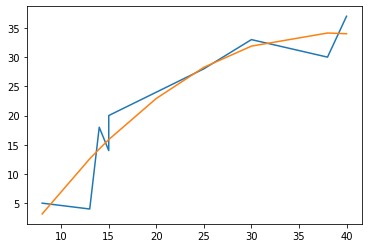

In [24]:
# 2차식 모델링
plt.plot(x, y)
z = np.polyfit(x, y, 2) # 차수 = 2
p = np.poly1d(z)
plt.plot(x, p(x))

## line plot/point plot
* 특정 데이터를 x, y로 표시하여 관계를 확인할 때 사용
* 수치형 지표들 간의 경향/시계열 데이터를 파악할 때 유용

[matplot.pyplot.plt](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html?highlight=pyplot%20plot#matplotlib.pyplot.plot)

[seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=line#seaborn.lineplot)

In [3]:
# 난수 생성 함수로 시계열 데이터 생성
np.random.seed(117)

index_date = pd.date_range(start = '2023-01-17',
                      periods = 200,
                      freq = 'D',
                      name = 'date')

data = np.random.randn(200, 4).cumsum(axis=0)

df = pd.DataFrame(data, index_date, ['a', 'b', 'c', 'd'])

df.head()

,a,b,c,d
date,,,,
2023-01-17,-1.828102,-0.442651,0.408344,-0.285126
2023-01-18,-1.725771,-0.404074,1.275305,0.648052
2023-01-19,-1.260709,-1.105792,1.900052,-0.980110
2023-01-20,-1.227638,-1.511317,2.593428,-0.116551
2023-01-21,-1.220862,-1.144726,2.789096,0.694782


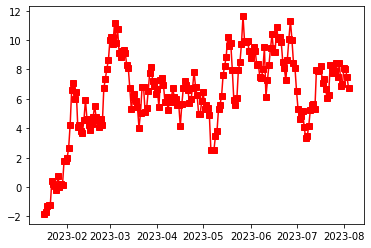

In [4]:
# matplotlib
# 수치형
plt.plot(df.index, df.a, marker = 's', color = 'red')
plt.show()

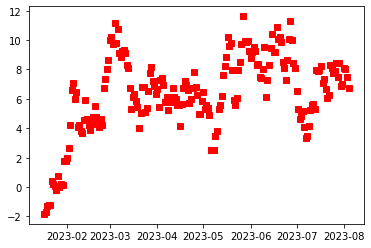

In [5]:
# matplotlib
# ls: linestyle
plt.plot(df.index, df.a, marker = 's', color = 'red', ls = "")
plt.show()

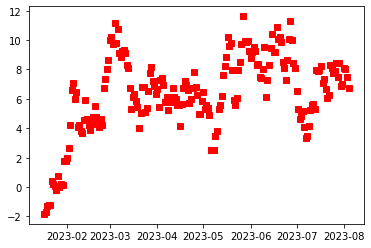

In [7]:
# matplotlib
plt.plot(df.index, df.a, 'rs') # 색상 - 마커(marker) - 선 스타일 (축약버전)
plt.show()

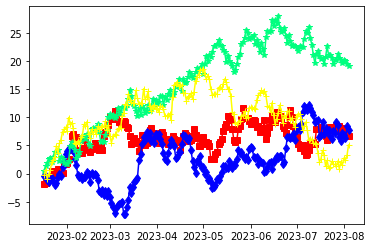

In [ ]:
# matplotlib
plt.plot(df.index, df.a, marker = 's', color = 'red')
plt.plot(df.index, df.b, marker = 'd', color = 'blue')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen')
plt.plot(df.index, df.d, marker = '+', color = 'yellow')
plt.show()

<색깔/스타일 코드 참고> <br>

![picture](https://drive.google.com/uc?id=1_c71MfqbdZdEBHxVfK6jL5EpsHN5uBmP)

![picture](https://drive.google.com/uc?id=1E7fO-XYOFK_7usuCm_3vPKZtLWp6q7Hv)

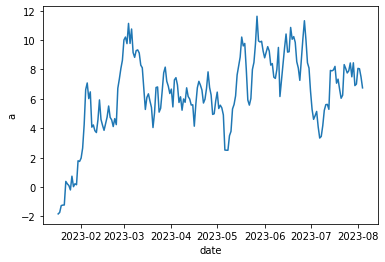

In [ ]:
# seaborn
sns.lineplot(data = df, x = df.index, y = 'a')
plt.show()

## heatmap
* x축과 y축에 해당하는 2개의 범주형 자료의 계급(class)별로 집계한 연속형 자료 표시
* 집계한 값에 비례하여 색깔을 다르게 하여 시각화

[matplotlib.pyplot.pcolor](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html?highlight=pcolor#matplotlib.pyplot.pcolor)

[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

In [ ]:
sns_flights = sns.load_dataset('flights')
sns_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
sns_flights = sns_flights.pivot('month', 'year', 'passengers')
sns_flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


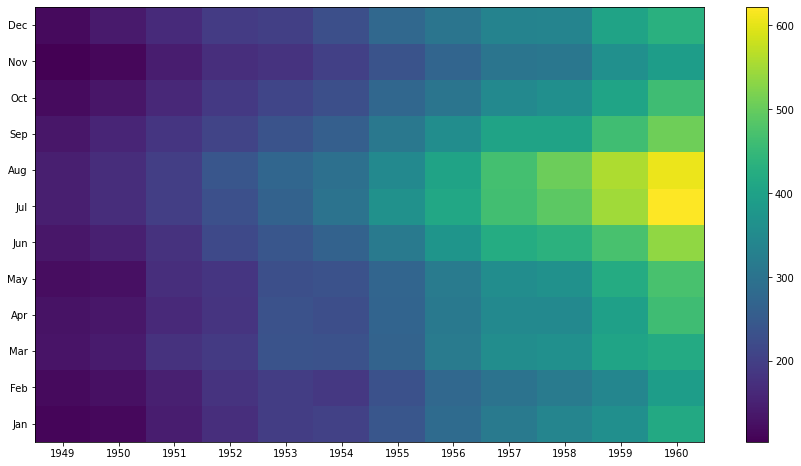

In [ ]:
# matplotlib
# 수치형: passengers 변수가 종속변수
# 다변량: month, year, passengers 세 개의 변수
plt.figure(figsize = (15, 8))
plt.pcolor(sns_flights)
plt.xticks(np.arange(0.5, len(sns_flights.columns), 1), sns_flights.columns)
plt.yticks(np.arange(0.5, len(sns_flights.index), 1), sns_flights.index)
plt.colorbar()
plt.show()

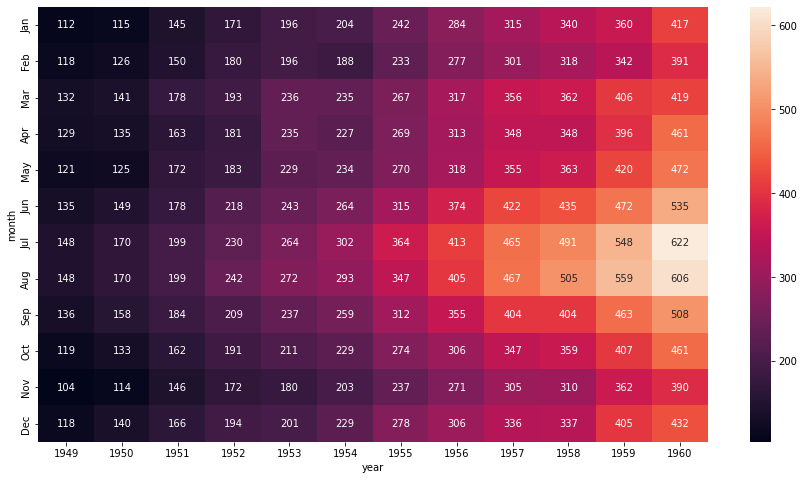

In [ ]:
# seaborn
# annot: 각 칸에 해당하는 숫자 표시
plt.figure(figsize = (15, 8))
sns.heatmap(sns_flights, annot = True, fmt = 'd')
plt.show()

## 그 외
* [matplotlib](https://datascienceschool.net/01%20python/05.02%20%EB%A7%B7%ED%94%8C%EB%A1%AF%EB%A6%AC%EB%B8%8C%EC%9D%98%20%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80%20%ED%94%8C%EB%A1%AF.html)

* [seaborn](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)

* https://www.data-to-viz.com/

# 세부 사항

## 크기/제목/축

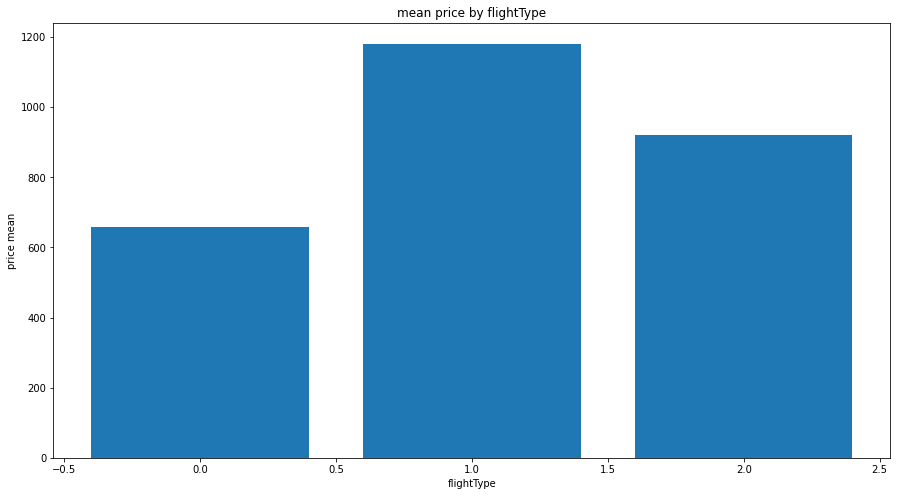

In [ ]:
plt.figure(figsize = (15, 8)) # 사이즈 설정
plt.bar(x = index, height = mean_price_by_flightType)
plt.title("mean price by flightType") # 제목 설정
plt.xlabel("flightType") # x축 라벨 설정
plt.ylabel("price mean") # y축 라벨 설정
plt.show()

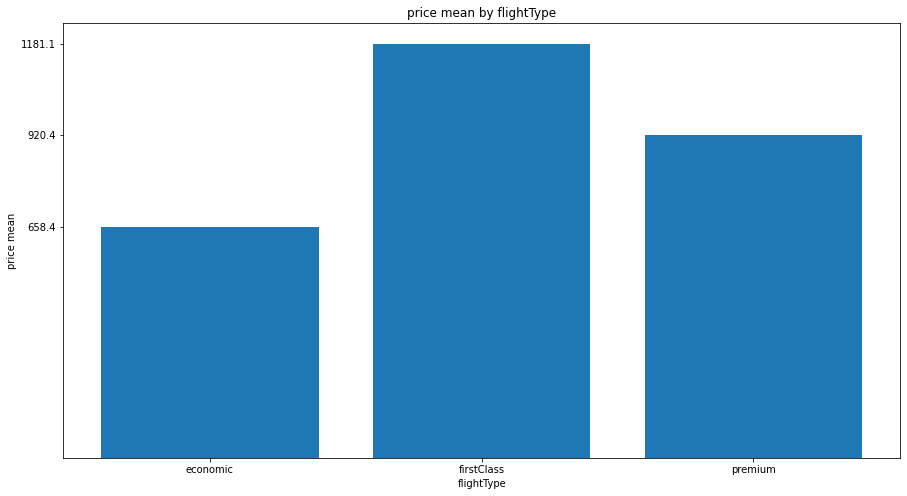

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(x = index, height = mean_price_by_flightType)
plt.title("price mean by flightType")
plt.xlabel("flightType")
plt.ylabel("price mean")
plt.xticks(index, ['economic', 'firstClass', 'premium']) # x축 눈금 설정
plt.yticks(mean_price_by_flightType) # y축 눈금 설정. 데이터 값 직접 표현.
plt.show()

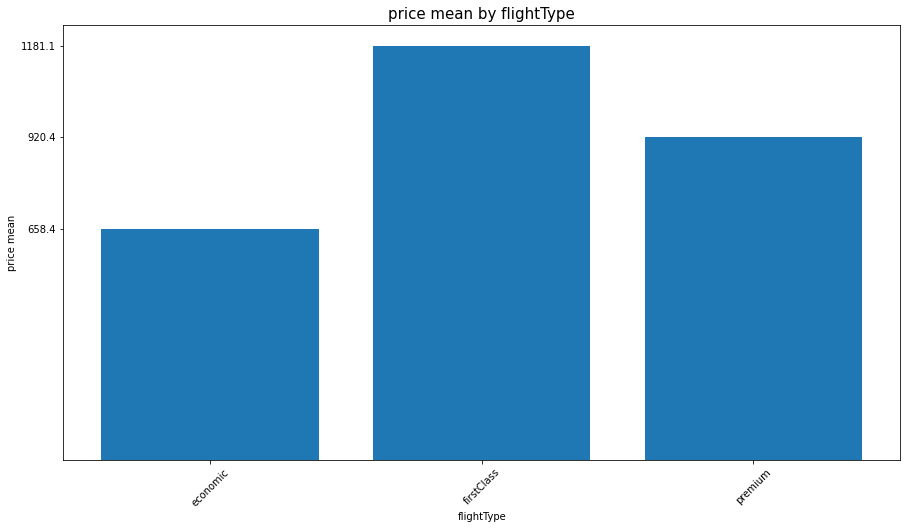

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(x = index, height = mean_price_by_flightType)
plt.title("price mean by flightType", fontsize = 15)
plt.xlabel("flightType")
plt.ylabel("price mean")
plt.xticks(index, ['economic', 'firstClass', 'premium'], rotation = 45, fontsize = 10) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
plt.yticks(mean_price_by_flightType) # y축 눈금 설정. 데이터 값 직접 표현.
plt.show()

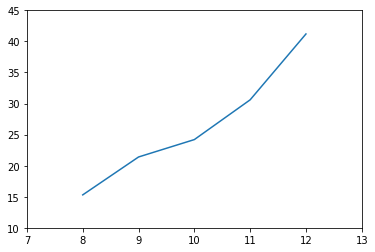

In [ ]:
x = [8, 9, 10, 11, 12]
y = [15.3, 21.4, 24.2, 30.6, 41.2]
plt.plot(x, y)
plt.axis([7, 13, 10, 45]) # [xmin, xmax, ymin, ymax]
plt.show()

### tick_params
- axis는 설정이 적용될 축을 지정. {'x', 'y', 'both'} 중 선택
- direction을 'in', 'out'으로 설정하면 눈금이 안/밖으로 표시. {'in', 'out', 'inout'} 중 선택
- length는 눈금의 길이를 지정
- labelsize는 레이블의 크기를 지정
- labelcolor는 레이블의 색상을 지정
- width는 눈금의 너비를 지정
- color는 눈금의 색상을 지정

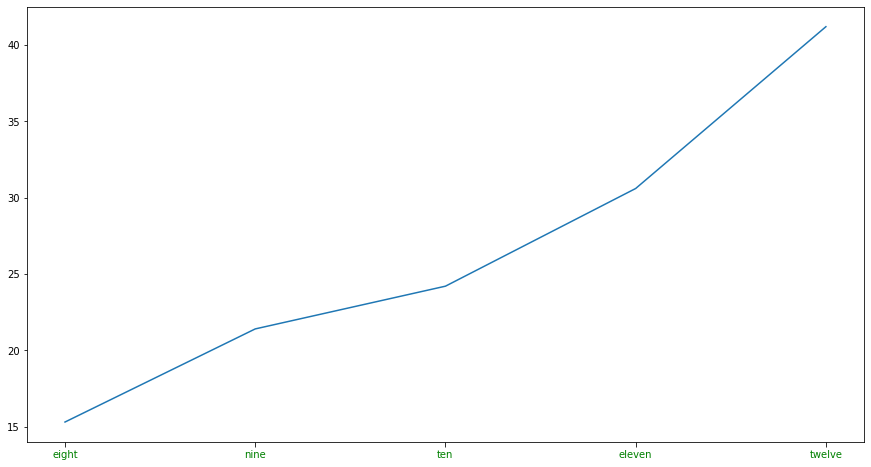

In [ ]:
x = [8, 9, 10, 11, 12]
y = [15.3, 21.4, 24.2, 30.6, 41.2]
plt.figure(figsize = (15, 8))
plt.plot(x, y)
plt.xticks(x, ['eight', 'nine', 'ten', 'eleven', 'twelve'])
plt.tick_params(axis = 'x', direction = 'out', length = 5, pad = 3, labelsize = 10, labelcolor = 'green')
plt.show()

## rcparams
배경 설정

In [ ]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

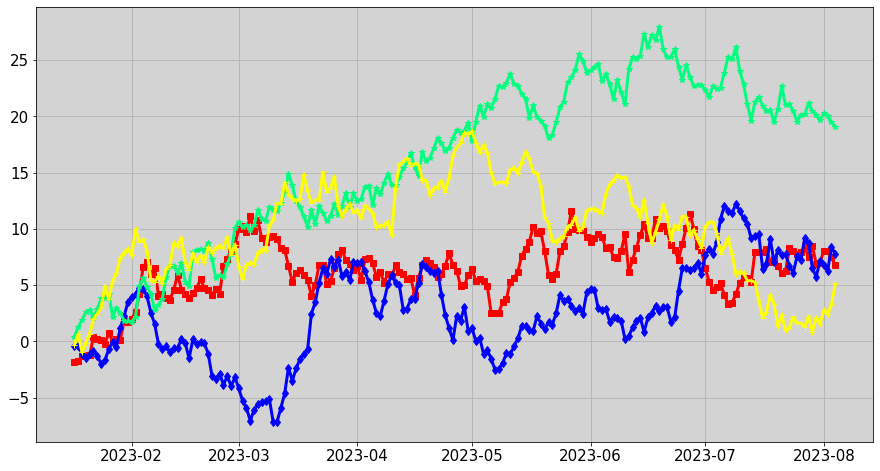

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8) # 그림 크기
plt.rcParams['lines.linewidth'] = 3 # 선 굵기
plt.rcParams['axes.facecolor'] = 'lightgrey' # 배경 색상
plt.rcParams['axes.grid'] = True # 격자 유무
plt.rcParams['font.size'] = 15 # 폰트 크기

plt.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
plt.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
plt.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')
plt.show()

## figure and subplot

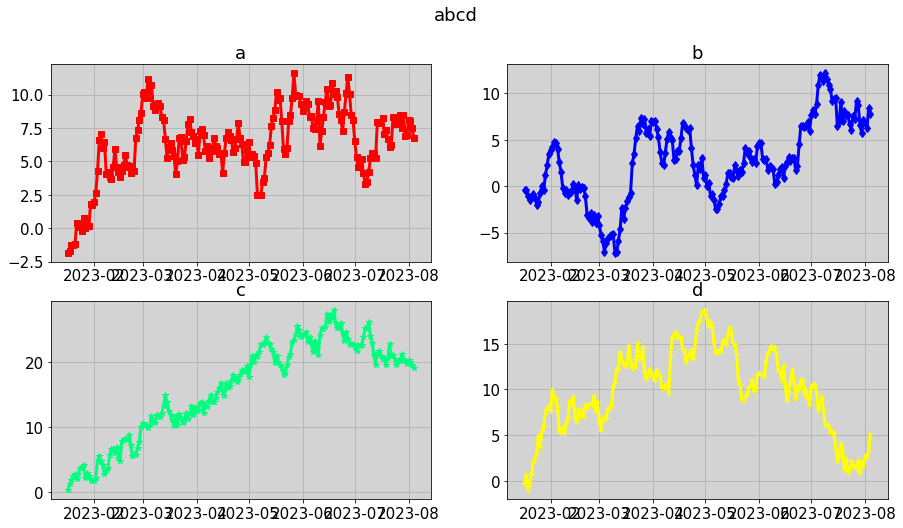

In [ ]:
# 방법 1
# subplots()를 이용해 새로운 그림(fig)과 축(axes) 생성
fig, axes = plt.subplots(2, 2, figsize = (15, 8)) # 2x2
axes[0,0].plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
axes[0,1].plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
axes[1,0].plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
axes[1,1].plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')

fig.suptitle('abcd')
axes[0,0].set_title('a')
axes[0,1].set_title('b')
axes[1,0].set_title('c')
axes[1,1].set_title('d')
plt.show()

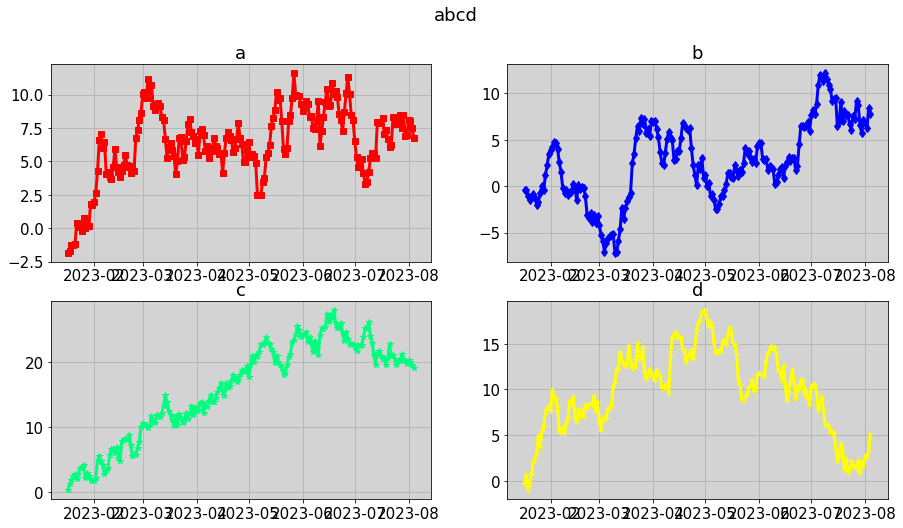

In [ ]:
# 방법 2
# subplots()를 이용해 새로운 그림(fig)과 축(axes) 생성
fig, axes = plt.subplots(2, 2, figsize = (15, 8)) # 2x2

df_col = ['a', 'b', 'c', 'd']
markers = ['s', 'd', '*', '+']
colors = ['red', 'blue', 'springgreen', 'yellow']

for i, ax in enumerate(axes.reshape(-1)):
  ax.plot(df.index, df[df_col[i]], marker = markers[i], color = colors[i])
  ax.set_title(df_col[i])

fig.suptitle('abcd')
plt.show()

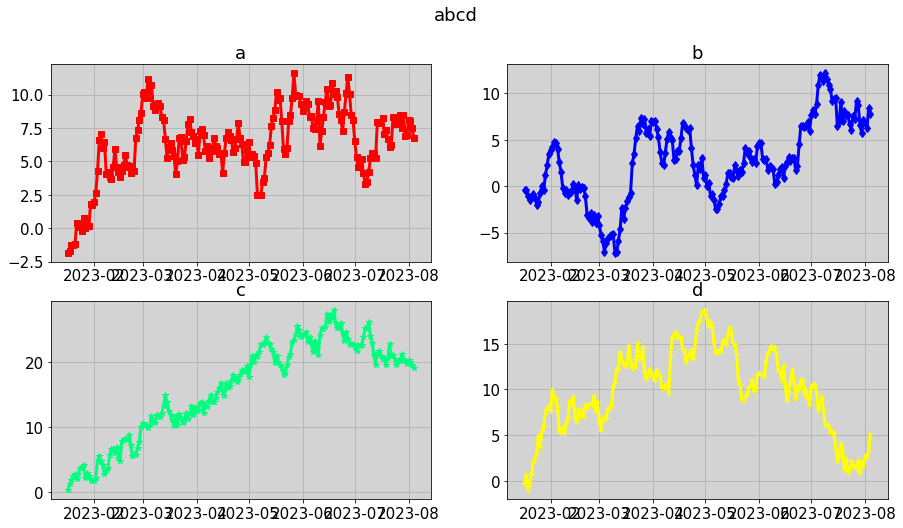

In [ ]:
# 방법 3
# figure()를 이용해 fig라는 이름의 새로운 그림(figure) 생성
fig = plt.figure()

# fig를 2x2로 4등분하고 개별 subplot 할당
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 각각의 subplot에 그림 그리기
ax1.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
ax2.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
ax3.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
ax4.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')

fig.suptitle('abcd')
ax1.set_title('a')
ax2.set_title('b')
ax3.set_title('c')
ax4.set_title('d')
plt.show()

In [ ]:
fig.savefig('/content/drive/MyDrive/plot저장2.pdf') # plt.show 이전에 수행

## 범례

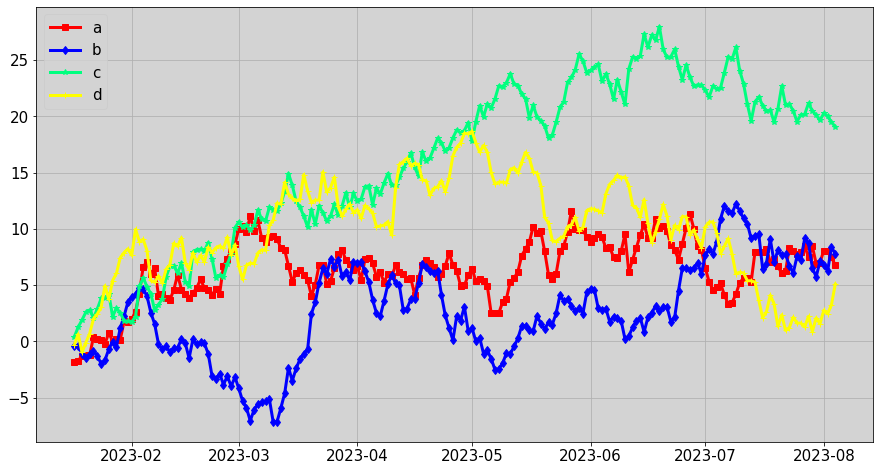

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(df.index, df.a, marker = 's', color = 'red')
plt.plot(df.index, df.b, marker = 'd', color = 'blue')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen')
plt.plot(df.index, df.d, marker = '+', color = 'yellow')
plt.legend(df.columns) # legend에 column명 넣어 범례 생성
plt.show()

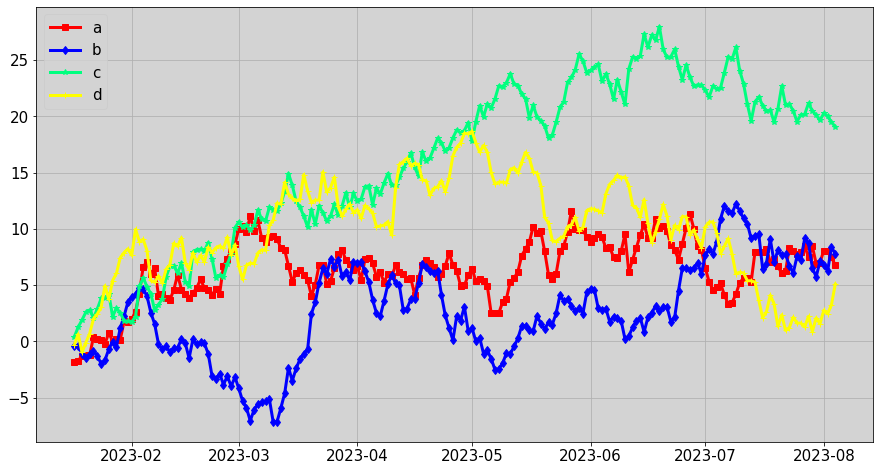

In [ ]:
# label 옵션을 따로 넣어 범례 생성
plt.figure(figsize = (15, 8))
plt.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
plt.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
plt.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')
plt.legend()
plt.show()

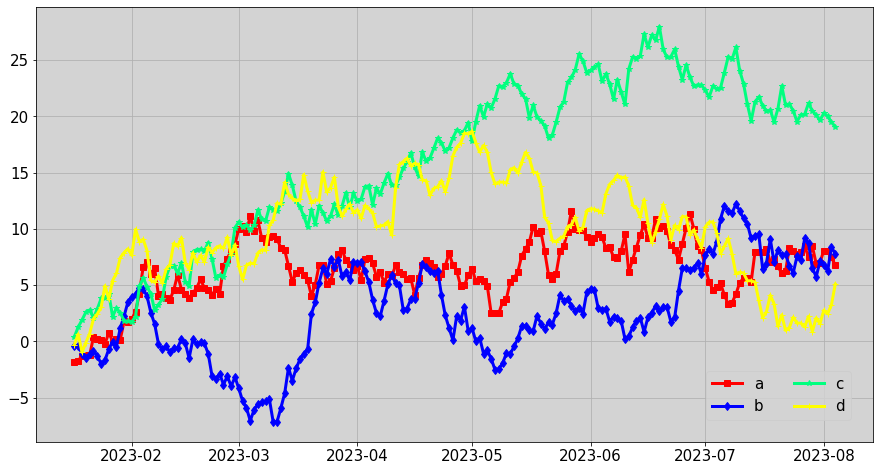

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
plt.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
plt.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')
plt.legend(loc = (0.8, 0.05), ncol = 2)
# loc : x, y축 각각의 길이를 1이라고 했을 때 위치로 직접 지정. loc = 'lower right' / loc = 4
# ncol : 범례에 표시될 텍스트의 열의 개수 지정
plt.show()

<범례 위치 코드 참고>

<img src='https://drive.google.com/uc?id=14u7fpskGCUbWmRWPD0EXg-6_vrIPCLOn' width="520" height="320">

## 폰트 설정

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
# 설치된 폰트 확인
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) # 나눔 폰트 없음.

sys_font number : 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/us

In [ ]:
# 나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 폰트가 정상적으로 설치됨.
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 48
nanum_font number : 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴 알아보기
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 15.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf' # 원하는 폰트의 경로 가져오기
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family = font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False # 그래프의 x, y축에 정상적인 - 표시 설정

# 런타임 다시 시작!

NanumSquare


In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴 알아보기.
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 15.0


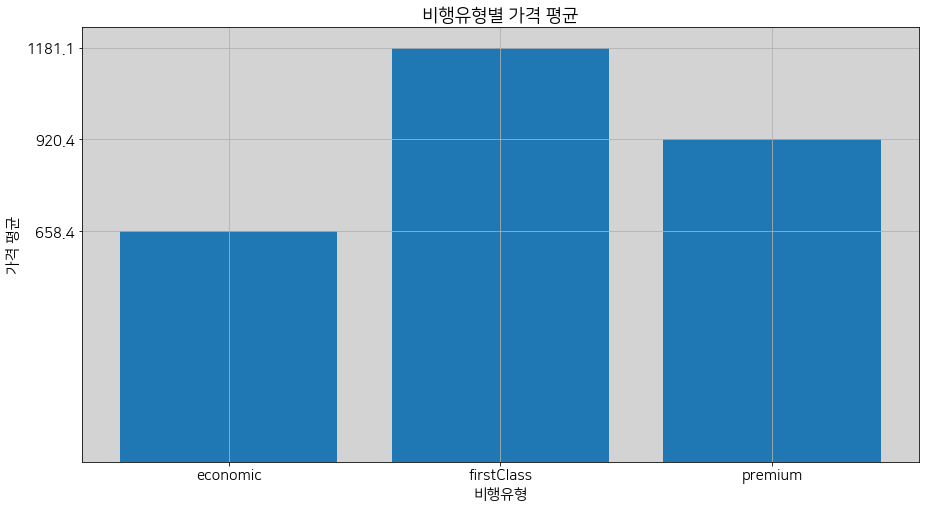

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(x = index, height = mean_price_by_flightType)
plt.title("비행유형별 가격 평균")
plt.xlabel("비행유형")
plt.ylabel("가격 평균")
plt.xticks(index, ['economic', 'firstClass', 'premium']) # x축 눈금 설정
plt.yticks(mean_price_by_flightType) # y축 눈금 설정. 데이터 값 직접 표현.
plt.show()

## 팔레트

* [[seaborn] color 팔레트 선택하기](https://hleecaster.com/python-seaborn-color/)

* [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

* [seaborn.light_palette](https://seaborn.pydata.org/generated/seaborn.light_palette.html?highlight=light_palette#seaborn.light_palette)

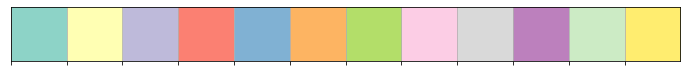

In [ ]:
# 팔레트 확인하기
# 팔레트를 변수로 저장.
palette = sns.color_palette("Set3")

# palplot을 통해 저장한 팔레트를 불러온다.
sns.palplot(palette)

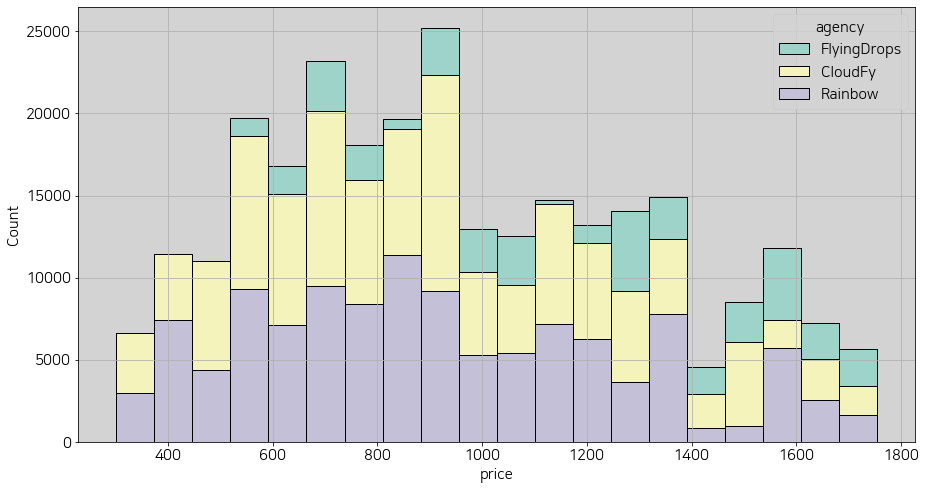

In [ ]:
sns.set_palette("Set3")
sns.histplot(data = flights, x = 'price', bins = 20, hue = 'agency', multiple = 'stack')
plt.show()

# 지도 시각화 (Geographic Visualization)

In [ ]:
# !pip install plotly_express
import plotly.express as px

In [ ]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

import urllib.request, json 
with urllib.request.urlopen(geo_json) as url:
    state_geo = json.loads(url.read().decode()) # json의 형태로 표현. json은 딕셔너리가 여러 개 겹친 것.

In [ ]:
state_info = pd.read_csv('/content/drive/MyDrive/Visualization 세션/report.txt', delimiter='\t').iloc[3:,:]
state_info['인구'] = state_info['인구'].apply(lambda x: int(''.join(x.split(','))))

In [ ]:
# 서울특별시 행정구별 위치 좌표
state_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [ ]:
state_info.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
3,2021.1/4,종로구,"74,113",156567,"75,772","80,795","147,296","71,644","75,652","9,271","4,128","5,143",1.99,"27,781"
4,2021.1/4,중구,"63,746",133708,"65,312","68,396","124,552","60,851","63,701","9,156","4,461","4,695",1.95,"24,767"
5,2021.1/4,용산구,"112,881",243336,"118,120","125,216","229,013","110,181","118,832","14,323","7,939","6,384",2.03,"39,575"
6,2021.1/4,성동구,"135,883",298421,"145,358","153,063","291,906","142,506","149,400","6,515","2,852","3,663",2.15,"45,968"
7,2021.1/4,광진구,"166,638",356191,"171,131","185,060","343,392","165,747","177,645","12,799","5,384","7,415",2.06,"50,370"


In [ ]:
fig = px.choropleth_mapbox(state_info,
                           geojson=state_geo,
                           locations='자치구',
                           color='인구',
                           color_continuous_scale='bupu', featureidkey = 'properties.name',
                           mapbox_style='carto-positron',
                           zoom=9,
                           center = {"lat": 37.563383, "lon": 126.996039}, #각각 위도, 경도
                           opacity=0.5
                          )

fig

# Word Cloud

## 텍스트 데이터 전처리
[텍스트 전처리 (Text Preprocessing)](https://wikidocs.net/21694)

In [ ]:
# !pip install konlpy

In [ ]:
import re
import konlpy

In [ ]:
with open(r'/content/drive/MyDrive/Visualization 세션/news.txt', encoding='utf-8') as f:
    text = f.readlines()

In [ ]:
text

['대출금리도 2.72% 사상최저\n',
 '\n',
 '\n',
 '\n',
 '\t\t\t\t은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다.\n',
 '\n',
 "한국은행이 31일 발표한 '6월 중 금융기관 가중평균금리'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 '1%대' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다.\n",
 '\n',
 '대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다.\n',
 '\n',
 '신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다.\n',
 '\n',
 '한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다.\n',
 '\n',
 "시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억

### 1. Text Cleaning
- list comprehension을 이용해 빈 줄과 문장 양 끝단의 공백 제거
- 텍스트 전처리를 위해 다시 하나의 string으로 묶기

[정규 표현식 (Regular Expression)](https://wikidocs.net/21703)

In [ ]:
text_strip = list([i.strip() for i in text if i != '\n'])
text_join = ' '.join(text_strip)

In [ ]:
text_join

'대출금리도 2.72% 사상최저 은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다. 한국은행이 31일 발표한 \'6월 중 금융기관 가중평균금리\'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 \'1%대\' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다. 대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다. 신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다. 한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다. 시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다. 역대 6월 최대 증가 폭이다. 더 늦기 전에 집이나 주식을 사자는 \'패닉 바잉\' 수요가 가계대출 증가의 주범이라는 해석이 나온다.

In [ ]:
# 특수문자 제거
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)

print(filtered_content)

대출금리도 2 72  사상최저 은행 예금에 사상 첫  0 대 금리  시대가 열렸다  1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다  은행 예 적금이 돈을 불리는 수단이 아닌  있는 돈을 그저 안전하게 보관하는  금고 에 그치는 시대가 된 셈이다  이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다   이러니 주식 부동산으로 돈이 안 쏠릴 수 없다 는 말이 나온다  한국은행이 31일 발표한  6월 중 금융기관 가중평균금리 에 따르면  지난달 은행 예금 금리는 0 88 로 전월 대비 0 19 포인트 내렸다  역대 처음으로  1 대  금리가 깨진 것이다  은행권의 정기예금 상품 67 1 는 금리 수준이 0 대였다  코로나 사태 이후 한은이 기준금리를 사상 최저인 0 5 까지 끌어내리면서  예금 금리 역시 덩달아 내려간 것이다  대출 금리도 일제히 역대 최저 수준으로 떨어졌다  은행권의 대출 금리는 평균 2 72 로 역대 최저로 집계됐다  가계 대출 금리는 2 67 였다  신용대출 3 33 2 93    주택담보대출 2 52 2 49   모두 내렸다  특히 신용대출 금리는 전월 대비 0 4 포인트나 떨어졌다  신용대출 금리가 2 대로 내려온 건 이번이 처음이다  신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다  한은 관계자는  6 17 부동산 대책을 전후로 주택 매매 전세 거래가 증가했는데  주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편 이라며  신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다 고 설명했다  시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다  한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다  역대 6월 최대 증가 폭이다  더 늦기 전에 집이나 주식을 사자는  패닉 바잉  수요가 가계대출 증가의 주범이라는 해석이 나온다  워낙 금리가 낮기 

### 2. 형태소 분석기

In [ ]:
komoran = konlpy.tag.Komoran()
komoran_pos = komoran.pos(filtered_content)
print(komoran_pos)

[('대출금', 'NNG'), ('리도', 'NNP'), ('2', 'SN'), ('72', 'SN'), ('사상', 'NNG'), ('최저', 'NNG'), ('은행', 'NNG'), ('예금', 'NNG'), ('에', 'JKB'), ('사상', 'NNG'), ('첫', 'MM'), ('0', 'SN'), ('대', 'NNB'), ('금리', 'NNG'), ('시대', 'NNG'), ('가', 'JKS'), ('열리', 'VV'), ('었', 'EP'), ('다', 'EC'), ('1', 'SN'), ('억', 'NR'), ('원', 'NNB'), ('을', 'JKO'), ('은행', 'NNG'), ('에', 'JKB'), ('예금', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('보', 'VX'), ('았', 'EP'), ('자', 'EC'), ('연간', 'NNG'), ('100', 'SN'), ('만원', 'NNP'), ('받', 'VV'), ('기', 'ETN'), ('도', 'JX'), ('어렵', 'VA'), ('다는', 'ETM'), ('얘기', 'NNG'), ('다', 'JX'), ('은행', 'NNG'), ('예', 'NNG'), ('적금', 'NNP'), ('이', 'JKS'), ('돈', 'NNG'), ('을', 'JKO'), ('불리', 'VV'), ('는', 'ETM'), ('수단', 'NNG'), ('이', 'JKS'), ('아니', 'VCN'), ('ㄴ', 'ETM'), ('있', 'VV'), ('는', 'ETM'), ('돈', 'NNG'), ('을', 'JKO'), ('그저', 'MAG'), ('안전', 'NNG'), ('하', 'XSV'), ('게', 'EC'), ('보관', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('금고', 'NNP'), ('에', 'JKB'), ('그치', 'VV'), ('는', 'ETM'), ('시대', 'NNG'), ('가', 'JKS'), ('되', 'VV

In [ ]:
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [ ]:
komoran.morphs(filtered_content)

['대출금',
 '리도',
 '2',
 '72',
 '사상',
 '최저',
 '은행',
 '예금',
 '에',
 '사상',
 '첫',
 '0',
 '대',
 '금리',
 '시대',
 '가',
 '열리',
 '었',
 '다',
 '1',
 '억',
 '원',
 '을',
 '은행',
 '에',
 '예금',
 '하',
 '아',
 '보',
 '았',
 '자',
 '연간',
 '100',
 '만원',
 '받',
 '기',
 '도',
 '어렵',
 '다는',
 '얘기',
 '다',
 '은행',
 '예',
 '적금',
 '이',
 '돈',
 '을',
 '불리',
 '는',
 '수단',
 '이',
 '아니',
 'ㄴ',
 '있',
 '는',
 '돈',
 '을',
 '그저',
 '안전',
 '하',
 '게',
 '보관',
 '하',
 '는',
 '금고',
 '에',
 '그치',
 '는',
 '시대',
 '가',
 '되',
 'ㄴ',
 '셈',
 '이',
 '다',
 '이',
 '와',
 '더불',
 '어',
 '대출',
 '금리',
 '는',
 '역대',
 '최저',
 '기록',
 '을',
 '갈',
 '아',
 '치우',
 '었',
 '다',
 '이렇',
 '니',
 '주식',
 '부동산',
 '으로',
 '돈',
 '이',
 '안',
 '쏠리',
 'ㄹ',
 '수',
 '없',
 '다',
 '늘',
 'ㄴ',
 '말',
 '이',
 '나오',
 'ㄴ다',
 '한국은행',
 '이',
 '31',
 '일',
 '발표',
 '하',
 'ㄴ',
 '6월',
 '중',
 '금융',
 '기관',
 '가중',
 '평균',
 '금리',
 '에',
 '따르',
 '면',
 '지난달',
 '은행',
 '예금',
 '금리',
 '는',
 '0',
 '88',
 '로',
 '전월',
 '대비',
 '0',
 '19',
 '포인트',
 '내리',
 '었',
 '다',
 '역대',
 '처음',
 '으로',
 '1',
 '대',
 '금리',
 '가',
 '깨지',
 'ㄴ',
 '것',
 '이',


In [ ]:
# komoran은 명사만 따로 볼 수 있는 함수를 제공.
# okt는 명사 단어만 추출하는 알고리즘을 짜줘야 함.
print(komoran.nouns(filtered_content))
komoran_nouns = komoran.nouns(filtered_content)

['대출금', '리도', '사상', '최저', '은행', '예금', '사상', '대', '금리', '시대', '원', '은행', '예금', '연간', '만원', '얘기', '은행', '예', '적금', '돈', '수단', '돈', '안전', '보관', '금고', '시대', '셈', '대출', '금리', '역대', '최저', '기록', '주식', '부동산', '돈', '수', '말', '한국은행', '일', '발표', '6월', '중', '금융', '기관', '가중', '평균', '금리', '지난달', '은행', '예금', '금리', '로', '전월', '대비', '포인트', '역대', '처음', '대', '금리', '것', '은행', '정기예금', '상품', '금리', '수준', '대', '코로나', '사태', '이후', '한은', '기준', '금리', '사상', '최저', '예금', '금리', '것', '대출', '금리', '역대', '최저', '수준', '은행', '대출', '금리', '평균', '로', '역대', '최저', '집계', '가계', '대출', '금리', '신용', '대출', '주택', '담보', '대출', '신용', '대출', '금리', '전월', '대비', '포인트', '신용', '대출', '금리', '대로', '건', '이번', '처음', '신용', '대출', '금리', '것', '정부', '주', '규제', '강화', '신용', '대출', '집', '사람', '때문', '한', '관계자', '부동산', '대책', '전후', '주택', '매매', '전세', '거래', '증가', '주택', '거래', '관련', '신용', '대출', '사람', '우량', '차주', '비율', '편', '신용등급', '우량', '차주', '비율', '전체', '신용', '대출', '금리', '현상', '설명', '시장', '금리', '가계', '대출', '속도', '한은', '6월', '은행', '가계', '대출', '전월', '대비', '원', '증가', '

### 3. 불용어 제거

In [ ]:
# 불용어 처리 / 한 글자 처리
stop_words = ['이오', '에다', '하오', '마오']
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:
        while word in komoran_nouns:
            komoran_nouns.remove(word)

In [ ]:
print(len(komoran_nouns))
print(len(set(komoran_nouns)))
print(komoran_nouns)

189
97
['대출금', '리도', '사상', '최저', '은행', '예금', '사상', '금리', '시대', '은행', '예금', '연간', '만원', '얘기', '은행', '적금', '수단', '안전', '보관', '금고', '시대', '대출', '금리', '역대', '최저', '기록', '주식', '부동산', '한국은행', '발표', '6월', '금융', '기관', '가중', '평균', '금리', '지난달', '은행', '예금', '금리', '전월', '대비', '포인트', '역대', '처음', '금리', '은행', '정기예금', '상품', '금리', '수준', '코로나', '사태', '이후', '한은', '기준', '금리', '사상', '최저', '예금', '금리', '대출', '금리', '역대', '최저', '수준', '은행', '대출', '금리', '평균', '역대', '최저', '집계', '가계', '대출', '금리', '신용', '대출', '주택', '담보', '대출', '신용', '대출', '금리', '전월', '대비', '포인트', '신용', '대출', '금리', '대로', '이번', '처음', '신용', '대출', '금리', '정부', '규제', '강화', '신용', '대출', '사람', '때문', '관계자', '부동산', '대책', '전후', '주택', '매매', '전세', '거래', '증가', '주택', '거래', '관련', '신용', '대출', '사람', '우량', '차주', '비율', '신용등급', '우량', '차주', '비율', '전체', '신용', '대출', '금리', '현상', '설명', '시장', '금리', '가계', '대출', '속도', '한은', '6월', '은행', '가계', '대출', '전월', '대비', '증가', '역대', '6월', '최대', '증가', '늦기 전에', '주식', '사자', '패닉', '수요', '가계', '대출', '증가', '주범', '해석', '금리', '때문', '투자', '얘기', '주식

In [ ]:
def tokenizer(text):
    nouns = komoran.nouns(text)
    go_words = [noun for noun in nouns if noun not in stop_words]
    return [go_word for go_word in go_words if len(go_word)>1]

In [ ]:
tokenizer(filtered_content)

['대출금',
 '리도',
 '사상',
 '최저',
 '은행',
 '예금',
 '사상',
 '금리',
 '시대',
 '은행',
 '예금',
 '연간',
 '만원',
 '얘기',
 '은행',
 '적금',
 '수단',
 '안전',
 '보관',
 '금고',
 '시대',
 '대출',
 '금리',
 '역대',
 '최저',
 '기록',
 '주식',
 '부동산',
 '한국은행',
 '발표',
 '6월',
 '금융',
 '기관',
 '가중',
 '평균',
 '금리',
 '지난달',
 '은행',
 '예금',
 '금리',
 '전월',
 '대비',
 '포인트',
 '역대',
 '처음',
 '금리',
 '은행',
 '정기예금',
 '상품',
 '금리',
 '수준',
 '코로나',
 '사태',
 '이후',
 '한은',
 '기준',
 '금리',
 '사상',
 '최저',
 '예금',
 '금리',
 '대출',
 '금리',
 '역대',
 '최저',
 '수준',
 '은행',
 '대출',
 '금리',
 '평균',
 '역대',
 '최저',
 '집계',
 '가계',
 '대출',
 '금리',
 '신용',
 '대출',
 '주택',
 '담보',
 '대출',
 '신용',
 '대출',
 '금리',
 '전월',
 '대비',
 '포인트',
 '신용',
 '대출',
 '금리',
 '대로',
 '이번',
 '처음',
 '신용',
 '대출',
 '금리',
 '정부',
 '규제',
 '강화',
 '신용',
 '대출',
 '사람',
 '때문',
 '관계자',
 '부동산',
 '대책',
 '전후',
 '주택',
 '매매',
 '전세',
 '거래',
 '증가',
 '주택',
 '거래',
 '관련',
 '신용',
 '대출',
 '사람',
 '우량',
 '차주',
 '비율',
 '신용등급',
 '우량',
 '차주',
 '비율',
 '전체',
 '신용',
 '대출',
 '금리',
 '현상',
 '설명',
 '시장',
 '금리',
 '가계',
 '대출',
 '속도',
 '한은',
 '6월',
 '은행',
 '가계',
 '대출',

## Word Cloud 생성

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

### 빈도 분석

In [ ]:
from collections import Counter
c = Counter(komoran_nouns)
print(c['사상']) #dictionary처럼 특정 단어가 몇 번 등장하는지 볼 수도 있고
print(c) #전체를 다 프린트 해서 볼 수도 있음. 빈도수가 많은 것 순서로 나타남.

4
Counter({'금리': 17, '대출': 15, '은행': 7, '신용': 7, '최저': 5, '역대': 5, '사상': 4, '예금': 4, '평균': 4, '가계': 4, '증가': 4, '주식': 3, '6월': 3, '전월': 3, '대비': 3, '주택': 3, '시대': 2, '얘기': 2, '기록': 2, '부동산': 2, '포인트': 2, '처음': 2, '수준': 2, '한은': 2, '기준': 2, '사람': 2, '때문': 2, '거래': 2, '우량': 2, '차주': 2, '비율': 2, '투자': 2, '예탁금': 2, '대출금': 1, '리도': 1, '연간': 1, '만원': 1, '적금': 1, '수단': 1, '안전': 1, '보관': 1, '금고': 1, '한국은행': 1, '발표': 1, '금융': 1, '기관': 1, '가중': 1, '지난달': 1, '정기예금': 1, '상품': 1, '코로나': 1, '사태': 1, '이후': 1, '집계': 1, '담보': 1, '대로': 1, '이번': 1, '정부': 1, '규제': 1, '강화': 1, '관계자': 1, '대책': 1, '전후': 1, '매매': 1, '전세': 1, '관련': 1, '신용등급': 1, '전체': 1, '현상': 1, '설명': 1, '시장': 1, '속도': 1, '최대': 1, '늦기 전에': 1, '사자': 1, '패닉': 1, '수요': 1, '주범': 1, '해석': 1, '신용거래': 1, '융자': 1, '잔액': 1, '최고': 1, '경신': 1, '지난해': 1, '규모': 1, '증시': 1, '대기': 1, '자금': 1, '투자자': 1, '기후': 1, '기자': 1, '조선일보': 1, '무단': 1, '전재': 1, '배포': 1, '금지': 1})


In [ ]:
frequent = c.most_common(20)

print(frequent)

[('금리', 17), ('대출', 15), ('은행', 7), ('신용', 7), ('최저', 5), ('역대', 5), ('사상', 4), ('예금', 4), ('평균', 4), ('가계', 4), ('증가', 4), ('주식', 3), ('6월', 3), ('전월', 3), ('대비', 3), ('주택', 3), ('시대', 2), ('얘기', 2), ('기록', 2), ('부동산', 2)]


In [ ]:
# 한글 폰트를 가져와야 함 (본인 컴퓨터에서 가져오면 됨)
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'

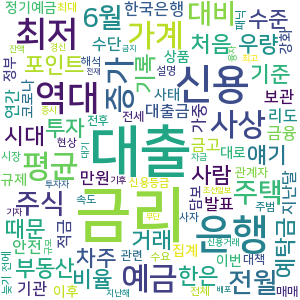

In [ ]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

# 참고자료

* 7기 권수현님 Visualization 세션
* DSL 210715 텍스트 마이닝 세션
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/index.html
* https://www.statology.org/matplotlib-trendline/
* https://medium.com/process-in-9-steps/%EB%8D%B0%EC%9D%B4%ED%84%B0-data-%EC%9D%98-%EC%A2%85%EB%A5%98-a9a4b7e21169
* https://mukut-da20.medium.com/univariate-bivariate-and-multivariate-analysis-using-python-fb30edb6d2e1
